In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [5]:
path = 'CSV_inspected_features/'
folder = os.fsencode(path)
renamed_markers_list = ['No.', 'Event', 'Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR', 'freq_slope_mean','freq_slope_std'] 
m_list = ['Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR', 'freq_slope_mean','freq_slope_std'] 
mean_list = [i + '_mean' for i in m_list]
std_list = [i + '_std' for i in m_list]

r_data = []
m_data = []
f_data = []
all_data = []
mr = []
fr = []

for file in os.listdir(folder):
    filename = os.fsdecode(file)
    fname = path + filename
    data = pd.read_csv(fname)
    data.columns = renamed_markers_list
    R_indicesToKeep = data['Event'] == 'R'
    df_r = data.loc[R_indicesToKeep]

    M_indicesToKeep = data['Event'] == 'M'
    df_m = data.loc[M_indicesToKeep]

    F_indicesToKeep = data['Event'] == 'F'
    df_f = data.loc[F_indicesToKeep]
   

    r_mean = pd.DataFrame(df_r[m_list].mean(axis=0)).transpose()
    m_mean = pd.DataFrame(df_m[m_list].mean(axis=0)).transpose()
    f_mean = pd.DataFrame(df_f[m_list].mean(axis=0)).transpose()

    r_mean.columns = mean_list
    m_mean.columns = mean_list
    f_mean.columns = mean_list

    r_std = pd.DataFrame(df_r[m_list].std(axis=0)).transpose()
    m_std = pd.DataFrame(df_m[m_list].std(axis=0)).transpose()
    f_std = pd.DataFrame(df_f[m_list].std(axis=0)).transpose()
        
    r_std.columns = std_list
    m_std.columns = std_list
    f_std.columns = std_list
    rest = pd.concat([r_mean,r_std],axis=1)
    med = pd.concat([m_mean,m_std],axis=1)
    fam = pd.concat([f_mean,f_std],axis=1)

    mr1 = med - rest
    fr1 = fam - rest

    mr.append(mr1)
    fr.append(fr1)


    rest.insert(0, 'Event', ['R'])
    med.insert(0, 'Event', 'M')
    fam.insert(0, 'Event', 'F')
    all = pd.concat([rest, med, fam],axis=0)
    
    
    all_data.append(all)



    #print(data.columns)
    
'''
    row_list = [rows.Delta, rows.Delta_N, rows.Theta, rows.Theta_N, rows.Alpha, rows.Alpha_N, rows.Beta, rows.Beta_N, rows.Gamma, rows.Gamma_N, rows.SE, rows.MSF, rows.Sef90, rows.Sef95, rows.PE, rows.wSMI, rows.Kolmogorov, rows.MeanRR, rows.StdRR, rows.MeanHR, rows.StdHR, rows.MinHR, rows.MaxHR]

    for index, rows in data.iterrows(): 
        if rows.Event == 'R':
            rest.append(row_list)
        
        if rows.Event == 'M':
            med.append(row_list)
        
        if rows.Event == 'F':
            fam.append(row_list)
'''

#print(len(rest)) # 3*4 x 23 features
#print(len(med)) # 4*10 x 23 features
#print(len(fam)) # 4*10 x 23 features
'''
rest.insert(0, renamed_markers_list[2:])
med.insert(0, renamed_markers_list[2:])
fam.insert(0, renamed_markers_list[2:])
'''


'\nrest.insert(0, renamed_markers_list[2:])\nmed.insert(0, renamed_markers_list[2:])\nfam.insert(0, renamed_markers_list[2:])\n'

In [ ]:
mr = pd.concat(mr)


In [10]:
len(mean_list)+len(std_list)

50

In [11]:
fr = pd.concat(fr)

In [9]:
mr

,Delta_mean,Delta_N_mean,Theta_mean,Theta_N_mean,Alpha_mean,Alpha_N_mean,Beta_mean,Beta_N_mean,Gamma_mean,Gamma_N_mean,...,wSMI_std,Kolmogorov_std,MeanRR_std,StdRR_std,MeanHR_std,StdHR_std,MinHR_std,MaxHR_std,freq_slope_mean_std,freq_slope_std_std
0,-0.809853,2.970962e-02,-2.140312,-4.388244e-02,1.257791,0.019844,-0.009879,6.852923e-03,-0.583840,3.234283e-03,...,-0.003655,0.007823,-4.855737,-5.719716,-0.527030,-0.423593,-2.760157,-0.330634,0.119595,0.021234
0,-2.286887,-3.421833e-02,-0.467397,1.591528e-02,1.251859,0.007973,-0.427760,6.242378e-03,-2.532148,-7.888638e-04,...,-0.003526,-0.005948,10.032354,39.062268,0.143953,3.465567,11.794659,6.075547,0.075075,0.031052
0,0.750667,-1.527838e-02,-0.936778,1.283603e-02,-1.809992,-0.024366,-4.360457,-6.257247e-02,-4.279366,-2.161348e-02,...,0.000215,0.007579,-11.544051,-0.154937,-2.164191,0.184885,1.499634,-2.522323,-0.025694,-0.006354
0,-1.467290,7.441296e-05,-1.239155,7.214713e-03,-1.089081,0.008745,-2.849495,-3.854430e-02,-8.267134,-3.637472e-02,...,0.000118,0.004805,12.038537,2.689933,1.569813,0.564960,0.054657,1.679286,0.048828,-0.021087
0,-1.469640,4.284311e-02,-2.736720,-7.670404e-03,-3.220067,-0.004454,-1.596337,7.998993e-03,-2.390266,-2.486786e-03,...,-0.003257,0.001541,14.334416,28.328251,0.861301,3.459944,1.467860,20.897215,-0.191884,-0.057165
0,1.427943,1.534159e-02,0.006125,1.951447e-02,0.978579,0.013927,-2.151813,-5.211309e-02,-2.134344,-3.538816e-02,...,-0.003574,0.001054,-8.713133,18.920560,-1.203535,-2.739088,4.243154,-23.801082,-0.100083,-0.029755
0,0.459775,-3.939838e-02,0.187958,2.238001e-02,-0.315984,0.006724,-2.966313,-1.504438e-02,-1.794521,-7.010849e-04,...,0.002218,-0.014399,-1.314014,6.123923,1.230192,1.582007,-2.889990,5.011846,-0.036335,0.022774
0,-0.540138,1.896100e-02,-1.271584,-3.091399e-02,-1.602492,0.013625,-1.999368,-2.481944e-02,-0.124487,-9.959480e-03,...,-0.002909,-0.017933,-7.097968,-12.203535,-1.092376,-0.366331,-0.045600,-2.776973,-0.004133,-0.058287
0,-0.229846,6.987118e-03,-0.062603,1.640079e-02,0.224348,-0.001818,-0.177828,-5.035111e-03,0.278022,2.136133e-03,...,-0.005911,-0.000346,22.359330,13.075684,1.103439,0.167803,0.058300,2.180748,0.127934,-0.024246
0,0.292020,-6.911869e-02,-0.557492,-2.322475e-02,-1.754970,-0.025587,-1.361947,-1.449527e-02,-3.479549,-1.441824e-02,...,-0.002080,0.005842,-20.724375,22.113953,-2.763494,0.909653,0.565994,-1.085345,-0.114563,-0.071142


In [3]:
df_all = pd.concat(all_data)


In [4]:
df_all

,Event,Delta_mean,Delta_N_mean,Theta_mean,Theta_N_mean,Alpha_mean,Alpha_N_mean,Beta_mean,Beta_N_mean,Gamma_mean,...,wSMI_std,Kolmogorov_std,MeanRR_std,StdRR_std,MeanHR_std,StdHR_std,MinHR_std,MaxHR_std,freq_slope_mean_std,freq_slope_std_std
0,R,-108.534350,0.320350,-112.302953,0.203874,-119.978503,0.046908,-119.533379,0.066228,-125.783500,...,0.010929,0.003076,18.458290,18.367603,1.748641,1.232724,4.989463,2.446302,0.040635,0.047570
0,M,-109.344203,0.350060,-114.443264,0.159992,-118.720712,0.066753,-119.543258,0.073081,-126.367340,...,0.007274,0.010900,13.602553,12.647888,1.221611,0.809131,2.229306,2.115668,0.160230,0.068804
0,F,-108.322934,0.346121,-114.770811,0.155567,-119.759917,0.062810,-120.730653,0.057695,-126.546161,...,0.007042,0.011600,10.327132,12.869897,0.859557,0.823878,1.926639,2.300639,0.290516,0.065142
0,R,-97.627626,0.341729,-103.057940,0.201860,-111.973239,0.050258,-111.772451,0.038251,-115.413747,...,0.010288,0.012751,21.327163,50.585503,3.861517,4.783043,7.865627,19.901089,0.147689,0.043180
0,M,-99.914513,0.307511,-103.525337,0.217775,-110.721380,0.058231,-112.200211,0.044494,-117.945895,...,0.006763,0.006804,31.359517,89.647771,4.005470,8.248610,19.660286,25.976636,0.222764,0.074232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,M,-101.497211,0.353846,-105.013253,0.231479,-111.223558,0.074620,-113.920237,0.042680,-122.106066,...,0.004266,0.006572,7.140536,0.683972,0.765057,0.067822,0.875514,0.903981,0.187463,0.041921
0,F,-98.830686,0.333742,-103.875909,0.186369,-109.550354,0.074702,-112.850756,0.046272,-121.578692,...,0.008486,0.010581,8.971300,1.115736,0.973464,0.105855,1.036176,0.762141,0.150376,0.063105
0,R,-99.153123,0.323062,-103.472601,0.208095,-108.918535,0.072876,-106.210149,0.110903,-107.811250,...,0.010278,0.002941,8.584844,4.305068,1.791920,0.860062,5.057592,2.451153,0.229827,0.044345
0,M,-99.910876,0.296158,-102.725187,0.214506,-107.969379,0.090671,-107.797801,0.105630,-110.310920,...,0.007924,0.005266,5.121835,9.376169,1.054698,2.130716,3.734654,14.481205,0.195106,0.064264


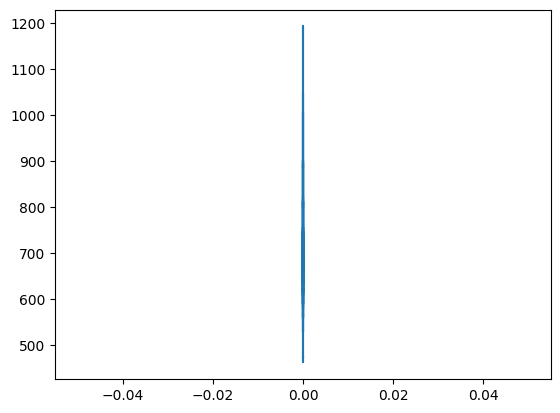

In [5]:
df_all['MeanRR_mean'].plot()
plt.show()

In [6]:
R_indicesToKeep = df_all['Event'] == 'R'
df_r = df_all.loc[R_indicesToKeep]

M_indicesToKeep = df_all['Event'] == 'M'
df_m = df_all.loc[M_indicesToKeep]

F_indicesToKeep = df_all['Event'] == 'F'
df_f = df_all.loc[F_indicesToKeep]

In [7]:
df_r

,Event,Delta_mean,Delta_N_mean,Theta_mean,Theta_N_mean,Alpha_mean,Alpha_N_mean,Beta_mean,Beta_N_mean,Gamma_mean,...,wSMI_std,Kolmogorov_std,MeanRR_std,StdRR_std,MeanHR_std,StdHR_std,MinHR_std,MaxHR_std,freq_slope_mean_std,freq_slope_std_std
0,R,-108.534350,0.320350,-112.302953,0.203874,-119.978503,0.046908,-119.533379,0.066228,-125.783500,...,0.010929,0.003076,18.458290,18.367603,1.748641,1.232724,4.989463,2.446302,0.040635,0.047570
0,R,-97.627626,0.341729,-103.057940,0.201860,-111.973239,0.050258,-111.772451,0.038251,-115.413747,...,0.010288,0.012751,21.327163,50.585503,3.861517,4.783043,7.865627,19.901089,0.147689,0.043180
0,R,-101.867545,0.354439,-105.832023,0.175476,-111.420137,0.079667,-108.900108,0.127008,-115.176454,...,0.005730,0.001628,38.552584,8.305338,6.914738,1.334832,5.162612,7.594033,0.209955,0.069312
0,R,-99.427986,0.391375,-111.435309,0.074415,-116.451297,0.033355,-111.241536,0.097682,-111.254895,...,0.005698,0.012242,5.689843,10.525075,0.595726,1.057575,2.079251,3.060947,0.131064,0.114668
0,R,-101.510623,0.338295,-108.227327,0.165997,-116.279765,0.040347,-120.093856,0.018705,-124.210034,...,0.008070,0.008103,34.417626,109.279422,1.350075,2.214375,6.303617,0.351868,0.342733,0.127331
0,R,-105.410470,0.283272,-110.101852,0.134010,-114.851827,0.047396,-106.368019,0.196055,-107.087554,...,0.008728,0.003698,29.099027,49.860589,2.784843,6.497658,6.805225,34.696243,0.258464,0.103843
0,R,-102.568940,0.375506,-109.958985,0.148178,-113.634140,0.064629,-114.412448,0.045478,-125.136464,...,0.002333,0.023469,29.594625,33.050253,5.259106,4.365903,11.211027,15.592780,0.165844,0.067297
0,R,-114.105414,0.320472,-121.798133,0.139838,-128.498782,0.032096,-125.692883,0.092335,-130.301195,...,0.008894,0.025733,15.680346,13.969031,2.362862,0.561130,1.411133,4.209979,0.159996,0.121306
0,R,-104.383350,0.317243,-108.230432,0.172695,-111.318007,0.124852,-113.908677,0.084726,-123.764609,...,0.011931,0.008753,5.538462,19.641824,0.404423,1.247793,1.008891,4.913137,0.085231,0.058677
0,R,-104.566680,0.388982,-110.261541,0.196345,-116.129140,0.078658,-115.960114,0.078716,-122.627366,...,0.006405,0.002583,30.200021,0.544216,4.061655,0.073556,3.971192,4.116692,0.241598,0.138511


In [8]:
# Statistics in each event
m_list = ['Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR'] 
m_list = mean_list + std_list

r_mean = df_r[m_list].mean(axis=0)
m_mean = df_m[m_list].mean(axis=0)
f_mean = df_f[m_list].mean(axis=0)

r_std = df_r[m_list].std(axis=0)
m_std = df_m[m_list].std(axis=0)
f_std = df_f[m_list].std(axis=0)

print(r_mean)

Delta_mean             -135.024894
Delta_N_mean              0.287699
Theta_mean             -141.038265
Theta_N_mean              0.139326
Alpha_mean             -145.016528
Alpha_N_mean              0.073816
Beta_mean              -144.930274
Beta_N_mean               0.081443
Gamma_mean             -150.266338
Gamma_N_mean              0.038957
SE_mean                   0.052392
MSF_mean                  1.798202
Sef90_mean                4.568591
Sef95_mean                5.457340
PE_mean                   0.047425
wSMI_mean                 0.020201
Kolmogorov_mean           0.027889
MeanRR_mean             703.306826
StdRR_mean               30.484363
MeanHR_mean              89.422573
StdHR_mean                2.601644
MinHR_mean               84.502971
MaxHR_mean               96.537797
freq_slope_mean_mean     -3.010508
freq_slope_std_mean       0.310861
Delta_std                 3.237216
Delta_N_std               0.054448
Theta_std                 2.534285
Theta_N_std         

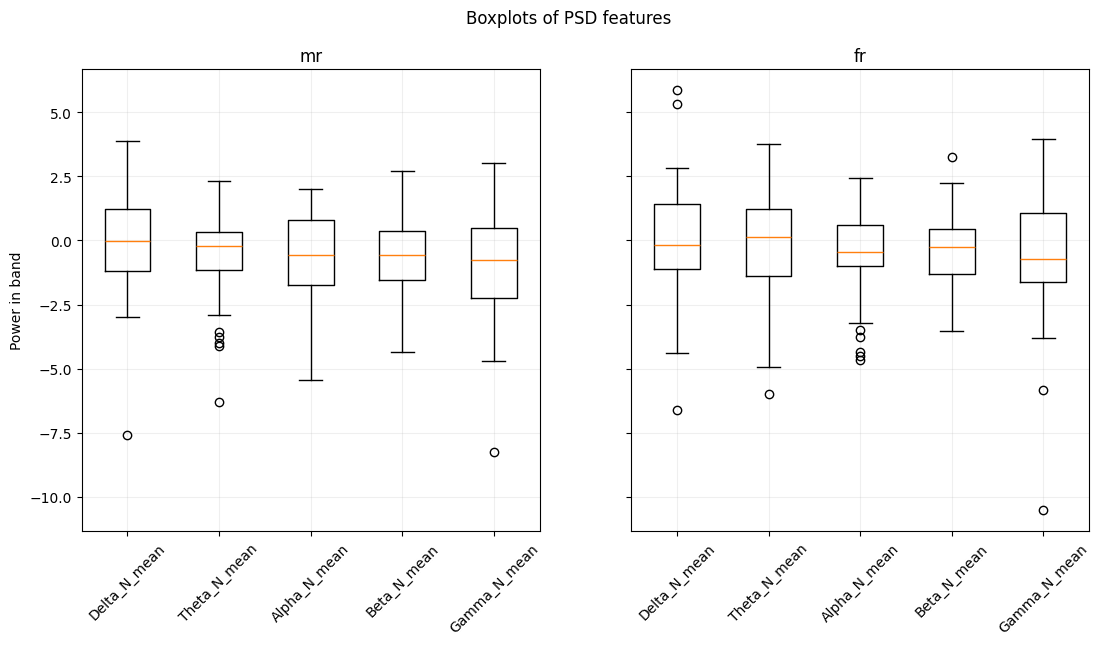

In [14]:
psd_r = mr[['Delta_mean', 'Theta_mean', 'Alpha_mean', 'Beta_mean', 'Gamma_mean']]
psd_m = fr[['Delta_mean', 'Theta_mean', 'Alpha_mean', 'Beta_mean', 'Gamma_mean']]

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(13, 6),sharey=True)

x = np.arange(1,5+1)

ax0.boxplot(psd_r)
ax0.set_ylabel('Power in band')
ax0.set_title('mr')
ax0.grid(alpha=0.2)
ax0.set_xticks(x, labels=('Delta_N_mean', 'Theta_N_mean', 'Alpha_N_mean', 'Beta_N_mean', 'Gamma_N_mean'), rotation=45)

ax1.boxplot(psd_m)
ax1.set_title('fr')
ax1.grid(alpha=0.2)
ax1.set_xticks(x, labels=('Delta_N_mean', 'Theta_N_mean', 'Alpha_N_mean', 'Beta_N_mean', 'Gamma_N_mean'), rotation=45)

fig.suptitle('Boxplots of PSD features')
plt.show()

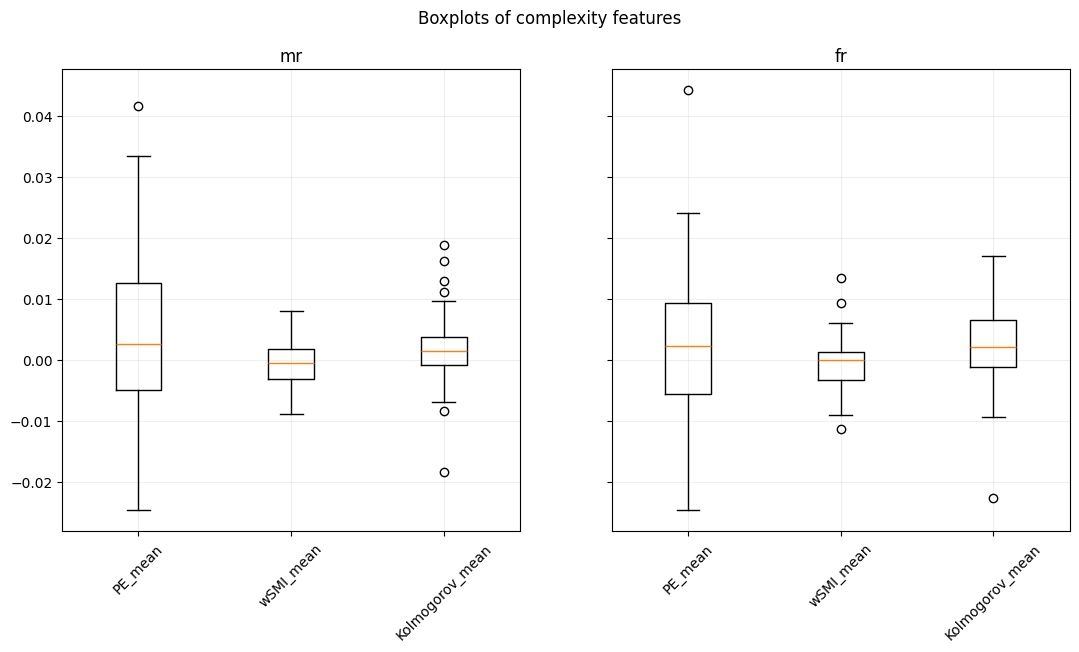

In [16]:
com_r = mr[['PE_mean', 'wSMI_mean', 'Kolmogorov_mean']]
com_m = fr[['PE_mean', 'wSMI_mean', 'Kolmogorov_mean']]

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(13, 6))

x = np.arange(1,3+1)

ax0.boxplot(com_r)
ax0.set_title('mr')
ax0.grid(alpha=0.2)
ax0.set_xticks(x, labels=('PE_mean', 'wSMI_mean', 'Kolmogorov_mean'), rotation=45)

ax1.boxplot(com_m)
ax1.set_title('fr')
ax1.grid(alpha=0.2)
ax1.set_xticks(x, labels=('PE_mean', 'wSMI_mean', 'Kolmogorov_mean'), rotation=45)

fig.suptitle('Boxplots of complexity features')
plt.show()

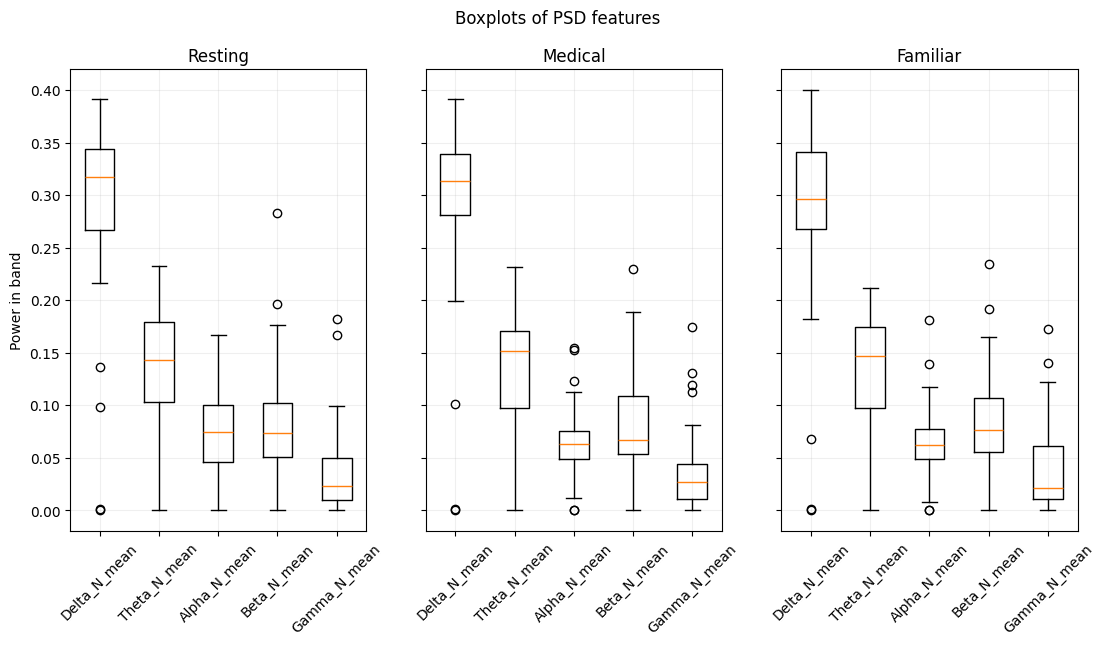

In [9]:
psd_r = df_r[['Delta_N_mean', 'Theta_N_mean', 'Alpha_N_mean', 'Beta_N_mean', 'Gamma_N_mean']]
psd_m = df_m[['Delta_N_mean', 'Theta_N_mean', 'Alpha_N_mean', 'Beta_N_mean', 'Gamma_N_mean']]
psd_f = df_f[['Delta_N_mean', 'Theta_N_mean', 'Alpha_N_mean', 'Beta_N_mean', 'Gamma_N_mean']]

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(13, 6),sharey=True)

x = np.arange(1,5+1)

ax0.boxplot(psd_r)
ax0.set_ylabel('Power in band')
ax0.set_title('Resting')
ax0.grid(alpha=0.2)
ax0.set_xticks(x, labels=('Delta_N_mean', 'Theta_N_mean', 'Alpha_N_mean', 'Beta_N_mean', 'Gamma_N_mean'), rotation=45)

ax1.boxplot(psd_m)
ax1.set_title('Medical')
ax1.grid(alpha=0.2)
ax1.set_xticks(x, labels=('Delta_N_mean', 'Theta_N_mean', 'Alpha_N_mean', 'Beta_N_mean', 'Gamma_N_mean'), rotation=45)

ax2.boxplot(psd_f)
ax2.set_title('Familiar')
ax2.grid(alpha=0.2)
ax2.set_xticks(x, labels=('Delta_N_mean', 'Theta_N_mean', 'Alpha_N_mean', 'Beta_N_mean', 'Gamma_N_mean'), rotation=45)

fig.suptitle('Boxplots of PSD features')
plt.show()


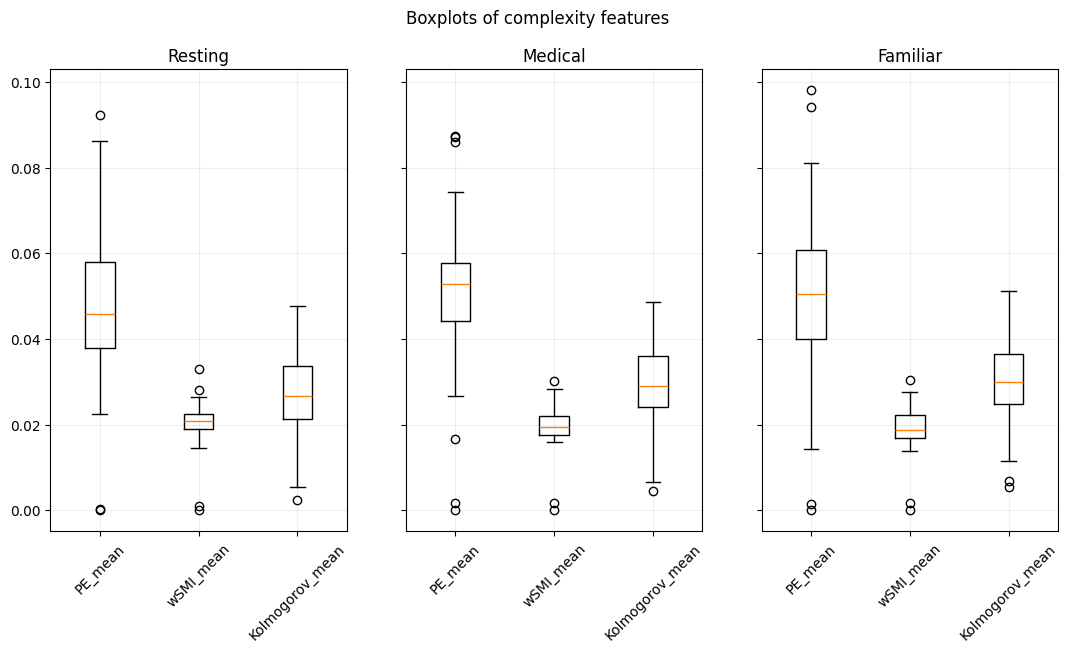

In [10]:
com_r = df_r[['PE_mean', 'wSMI_mean', 'Kolmogorov_mean']]
com_m = df_m[['PE_mean', 'wSMI_mean', 'Kolmogorov_mean']]
com_f = df_f[['PE_mean', 'wSMI_mean', 'Kolmogorov_mean']]

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(13, 6))

x = np.arange(1,3+1)

ax0.boxplot(com_r)
ax0.set_title('Resting')
ax0.grid(alpha=0.2)
ax0.set_xticks(x, labels=('PE_mean', 'wSMI_mean', 'Kolmogorov_mean'), rotation=45)

ax1.boxplot(com_m)
ax1.set_title('Medical')
ax1.grid(alpha=0.2)
ax1.set_xticks(x, labels=('PE_mean', 'wSMI_mean', 'Kolmogorov_mean'), rotation=45)

ax2.boxplot(com_f)
ax2.set_title('Familiar')
ax2.grid(alpha=0.2)
ax2.set_xticks(x, labels=('PE_mean', 'wSMI_mean', 'Kolmogorov_mean'), rotation=45)

fig.suptitle('Boxplots of complexity features')
plt.show()

In [11]:
com_r.mean(axis=0)

PE_mean            0.047425
wSMI_mean          0.020201
Kolmogorov_mean    0.027889
dtype: float64

In [12]:
com_m.mean(axis=0)

PE_mean            0.050893
wSMI_mean          0.019405
Kolmogorov_mean    0.029522
dtype: float64

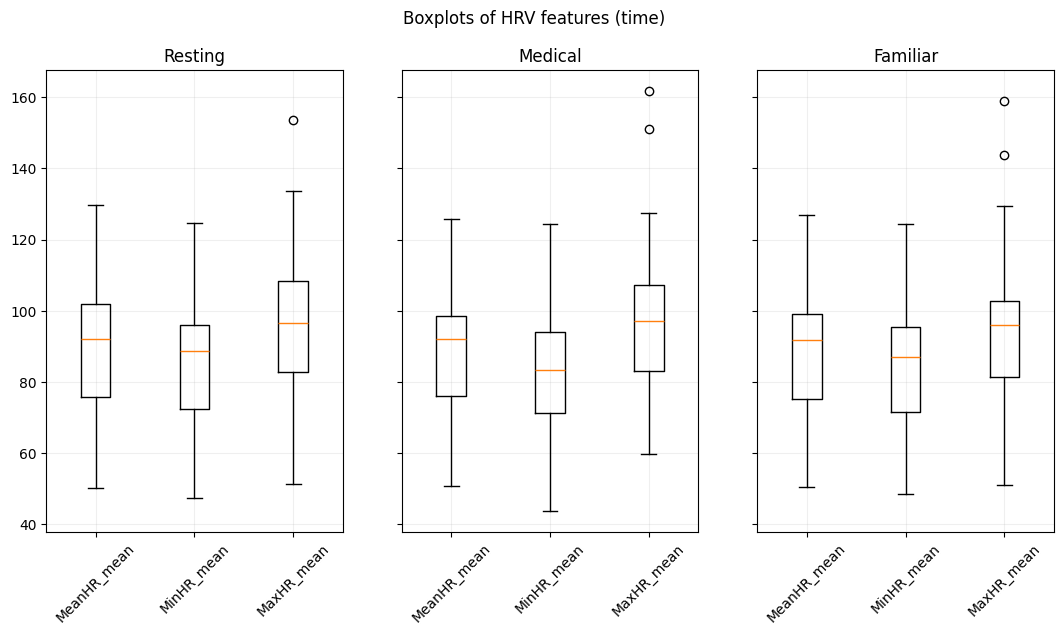

In [13]:
hrv_r = df_r[['MeanHR_mean', 'MinHR_mean', 'MaxHR_mean']]
hrv_m = df_m[['MeanHR_mean', 'MinHR_mean', 'MaxHR_mean']]
hrv_f = df_f[['MeanHR_mean', 'MinHR_mean', 'MaxHR_mean']]

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(13, 6))

x = np.arange(1,3+1)

ax0.boxplot(hrv_r)
ax0.set_title('Resting')
ax0.grid(alpha=0.2)
ax0.set_xticks(x, labels=('MeanHR_mean', 'MinHR_mean', 'MaxHR_mean'), rotation=45)

ax1.boxplot(hrv_m)
ax1.set_title('Medical')
ax1.grid(alpha=0.2)
ax1.set_xticks(x, labels=('MeanHR_mean', 'MinHR_mean', 'MaxHR_mean'), rotation=45)

ax2.boxplot(hrv_f)
ax2.set_title('Familiar')
ax2.grid(alpha=0.2)
ax2.set_xticks(x, labels=('MeanHR_mean', 'MinHR_mean', 'MaxHR_mean'), rotation=45)

fig.suptitle('Boxplots of HRV features (time)')
plt.show()

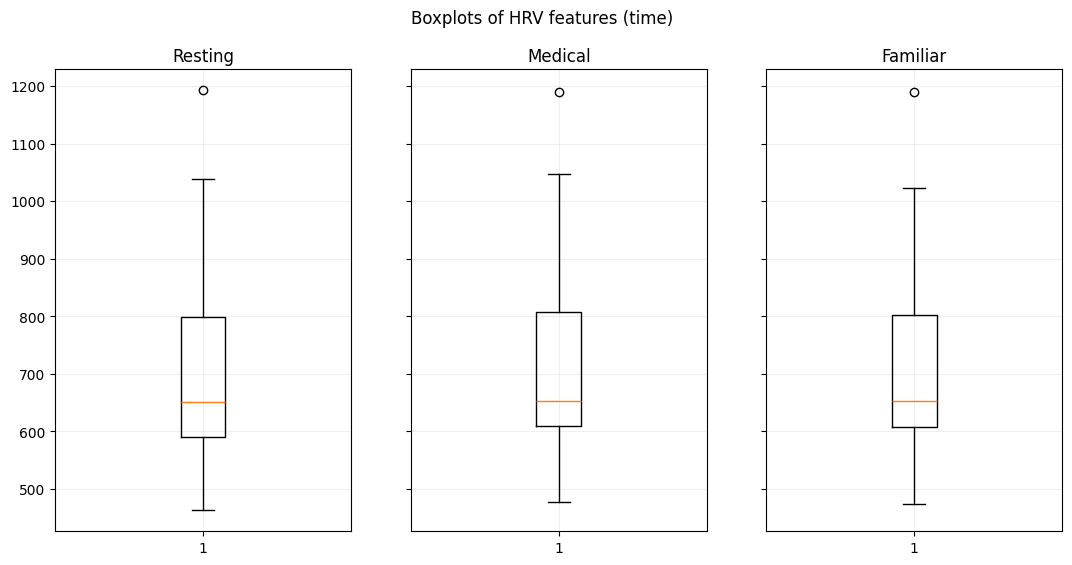

In [14]:
hrv_r = df_r[['MeanRR_mean']]
hrv_m = df_m[['MeanRR_mean']]
hrv_f = df_f[['MeanRR_mean']]

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(13, 6))

x = np.arange(1,1+1)

ax0.boxplot(hrv_r)
ax0.set_title('Resting')
ax0.grid(alpha=0.2)
#ax0.set_xticks(x, labels=('MeanRR_mean'), rotation=45)

ax1.boxplot(hrv_m)
ax1.set_title('Medical')
ax1.grid(alpha=0.2)
#ax1.set_xticks(x, labels=('MeanRR_mean'), rotation=45)

ax2.boxplot(hrv_f)
ax2.set_title('Familiar')
ax2.grid(alpha=0.2)
#ax2.set_xticks(x, labels=('MeanRR_mean'), rotation=45)

fig.suptitle('Boxplots of HRV features (time)')
plt.show()